# Chapter 3 Examples - R

In [1]:
#### Sytem may require the following: 
# sudo apt install libcurl4-openssl-dev
# sudo apt install libxml2-dev

#### Only need to run the folloing installs once
# install.packages(c("ggplot2", "ggpubr", "tidyverse", "broom", "AICcmodavg"))

## Load Libraries

In [33]:
library(readxl)
library(ggplot2)
library(ggpubr)
library(tidyverse)
library(broom)
library(AICcmodavg)

## 3.1

In [34]:
dataTable <- read_excel('../linear_regression_5e_data_sets/Chapter 3/Examples/data-ex-3-1 (Delivery Time).xls')

In [35]:
df <- data.frame(dataTable$`Delivery Time, y`, dataTable$`Number of Cases, x1`, dataTable$`Distance, x2 (ft)`)

In [36]:
colnames(df) <- c("DeliveryTime", "NumberCases", "Distance")

In [37]:
head(df)

,DeliveryTime,NumberCases,Distance
,<dbl>,<dbl>,<dbl>
1,16.68,7,560
2,11.50,3,220
3,12.03,3,340
4,14.88,4,80
5,13.75,6,150
6,18.11,7,330


In [38]:
summary(df)

  DeliveryTime    NumberCases       Distance     
 Min.   : 8.00   Min.   : 2.00   Min.   :  36.0  
 1st Qu.:13.75   1st Qu.: 4.00   1st Qu.: 150.0  
 Median :18.11   Median : 7.00   Median : 330.0  
 Mean   :22.38   Mean   : 8.76   Mean   : 409.3  
 3rd Qu.:21.50   3rd Qu.:10.00   3rd Qu.: 605.0  
 Max.   :79.24   Max.   :30.00   Max.   :1460.0  

In [39]:
linearMod <- lm(DeliveryTime ~ NumberCases + Distance, data=df)  # build linear regression model on full data
print(linearMod)


Call:
lm(formula = DeliveryTime ~ NumberCases + Distance, data = df)

Coefficients:
(Intercept)  NumberCases     Distance  
    2.34123      1.61591      0.01438  



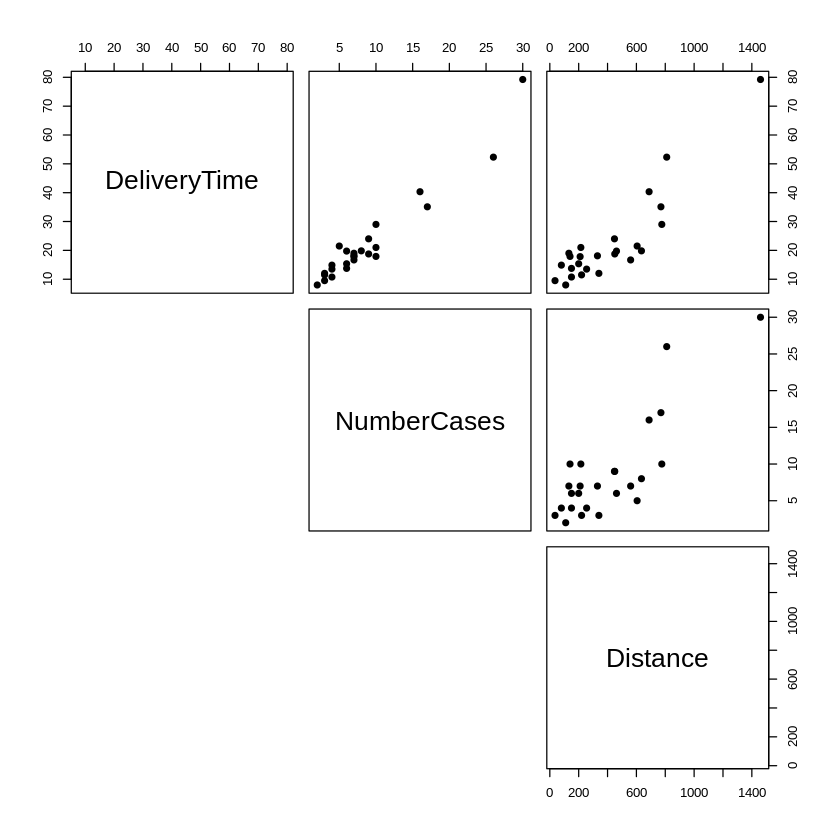

In [40]:
pairs(df[,1:3], pch=19, lower.panel = NULL)

In [110]:
summary(linearMod)


Call:
lm(formula = DeliveryTime ~ NumberCases + Distance, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7880 -0.6629  0.4364  1.1566  7.4197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.341231   1.096730   2.135 0.044170 *  
NumberCases 1.615907   0.170735   9.464 3.25e-09 ***
Distance    0.014385   0.003613   3.981 0.000631 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


In [42]:
one.way <- aov(DeliveryTime ~ NumberCases + Distance, data = df)
summary(one.way)

            Df Sum Sq Mean Sq F value   Pr(>F)    
NumberCases  1   5382    5382  506.62  < 2e-16 ***
Distance     1    168     168   15.85 0.000631 ***
Residuals   22    234      11                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [85]:
anova(linearMod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
NumberCases,1,5382.4088,5382.40880,506.61936,1.112549e-16
Distance,1,168.4021,168.40213,15.85085,6.312469e-04
Residuals,22,233.7317,10.62417,NA,NA


## 3.2

In [84]:
anova(linearMod)[[3]][3]

[1] 10.62417

## 3.3

In [111]:
x <- summary(linearMod)
x$fstatistic[[1]]

[1] 261.2351

## 3.4

In [112]:
summary(linearMod)


Call:
lm(formula = DeliveryTime ~ NumberCases + Distance, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7880 -0.6629  0.4364  1.1566  7.4197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.341231   1.096730   2.135 0.044170 *  
NumberCases 1.615907   0.170735   9.464 3.25e-09 ***
Distance    0.014385   0.003613   3.981 0.000631 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


In [116]:
names(x)

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [131]:
coef(x)[,'t value'][[3]]

[1] 3.981313

## 3.8

In [136]:
 confint(linearMod, level=0.95)

,2.5 %,97.5 %
(Intercept),0.066751987,4.61571030
NumberCases,1.261824662,1.96998976
Distance,0.006891745,0.02187791


## 3.9

In [ ]:
x = 1, 8, 275

In [137]:
pred<-predict(linearMod, data.frame(x = c(1, 8, 275)), interval="predict", level=0.95)
print(pred)

ERROR: Error in eval(predvars, data, env): object 'NumberCases' not found


In [138]:
newX = c(1,8,275)

In [140]:
typeof(newX)

[1] "double"

In [149]:
new <- data.frame(cnst = 1,NumberCases = 8,Distance = 275)

In [150]:
new

cnst,NumberCases,Distance
<dbl>,<dbl>,<dbl>
1,8,275


In [152]:
pred<-predict(linearMod, new, interval="conf", level=0.95)
print(pred)

       fit     lwr      upr
1 19.22432 17.6539 20.79474


## 3.12

In [153]:
pred<-predict(linearMod, new, interval="predict", level=0.95)
print(pred)

       fit      lwr      upr
1 19.22432 12.28456 26.16407


## Patient Satisfaction Data

In [154]:
dataTable <- read_excel('../linear_regression_5e_data_sets/Appendices/data-table-B17.xls')

In [155]:
dataTable

Satisfaction,Age,Severity,Surgical-Medical,Anxiety
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
68,55,50,0,2.1
77,46,24,1,2.8
96,30,46,1,3.3
80,35,48,1,4.5
43,59,58,0,2.0
44,61,60,0,5.1
26,74,65,1,5.5
88,38,42,1,3.2
75,27,42,0,3.1


In [ ]:
df <- data.frame(dataTable$`Delivery Time, y`, dataTable$`Number of Cases, x1`, dataTable$`Distance, x2 (ft)`)